In [663]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [664]:
dataSet = pd.read_csv('adult.csv')

In [665]:
dataSet.shape

(32560, 15)

In [666]:
dataSet.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [667]:
cols = ['age','workclass','fnlwgt','education','edu_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','country','income']

In [668]:
dataSet.columns = cols

In [669]:
dataSet.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [670]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   edu_num         32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  country         32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [671]:
dataSet[cols].isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
edu_num           0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income            0
dtype: int64

In [672]:
categorical = [var for var in dataSet.columns if dataSet[var].dtype=='O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'income']

In [673]:
dataSet[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [674]:
for var in categorical: 
    print(dataSet[var].value_counts()/float(len(dataSet)))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

In [675]:
dataSet.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [676]:
dataSet['workclass'].replace(' ?', np.NaN, inplace=True)
dataSet['occupation'].replace(' ?',np.NaN, inplace=True)
dataSet['country'].replace(' ?',np.NaN, inplace=True)

In [677]:
dataSet.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [678]:
numerical = [var for var in dataSet.columns if dataSet[var].dtype != 'O']

In [679]:
numerical

['age', 'fnlwgt', 'edu_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [680]:
dataSet[numerical].isnull().sum()

age               0
fnlwgt            0
edu_num           0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [681]:
le = LabelEncoder()

for var in categorical:
    if var != 'income':
     dataSet[var] = le.fit_transform(dataSet[var])

In [682]:
dataSet.info()
dataSet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  int32 
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  int32 
 4   edu_num         32560 non-null  int64 
 5   marital_status  32560 non-null  int32 
 6   occupation      32560 non-null  int32 
 7   relationship    32560 non-null  int32 
 8   race            32560 non-null  int32 
 9   sex             32560 non-null  int32 
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  country         32560 non-null  int32 
 14  income          32560 non-null  object
dtypes: int32(8), int64(6), object(1)
memory usage: 2.7+ MB


,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,<=50K


In [683]:
X = dataSet.drop(['income'],axis=1)
y = dataSet['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [684]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

In [685]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [686]:
mnb= MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [687]:
y_pred = mnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [688]:
accuracy_score(y_test, y_pred)

0.7875716625716626

In [689]:
cm = confusion_matrix(y_test, y_pred)
cm

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


True Positives(TP) =  7139

True Negatives(TN) =  554

False Positives(FP) =  315

False Negatives(FN) =  1760


<Axes: >

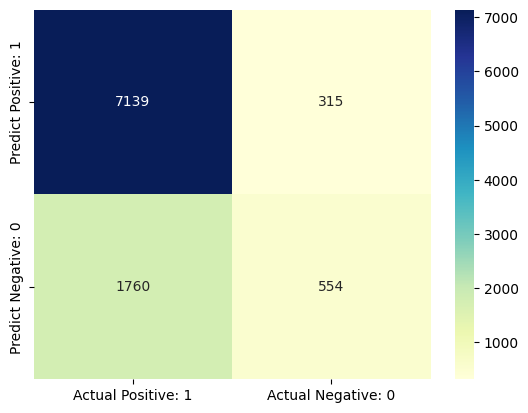

In [690]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive: 1', 'Actual Negative: 0'],index=['Predict Positive: 1', 'Predict Negative: 0'])

sns.heatmap(cm_matrix, annot=True, fmt = 'd', cmap='YlGnBu')

In [691]:
dat = dataSet.columns.tolist()
dat

['age',
 'workclass',
 'fnlwgt',
 'education',
 'edu_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'country',
 'income']